# DAE 6 Inferential Statistics

author:
- |
    Sofia Dahl, sof@create.aau.dk\
    Dept. Architecture, Design and Media Technology, Aalborg University Copenhagen
---

## Learning goals
After working your way through this notebook you should be able to..
- Explain what inferential statistics is used for
- Explain basic concept of probability
- Explain the relationship between probability and frequency distributions

## Table of Contents
- [1 Probability](#Probability)
- [2 From Probability to Hypothesis testing](#Hypothesis)  
    -[2.1 A practical example: heights](#Heights) 
- [3 Significance levels](#Significance)
    - [3.1 Detecting Effects](#Detecting)
- [4 Effect size](#Effect)
    - [4.1 Systematic and Unsystematic Variance](#Systematic)
- [5 Type I and II errors](#Error)   
    - [5.1 Statistical Power](#Power)

In [6]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<a id= 'Probability'> </a>

## 1. Probability

The reason why frequency distributions are so interesting is that they can be related to probabilities. 

The probability of an event, *p(A)*, can vary between 0 and 1 and is
defined as number of outcomes classified as A divided by the total
number of possible outcomes. For example, the probability of getting a 6
when rolling a six-sided die is:

$$p(6) = {{ 1} \over{6} }$$

p(A) =1 if the event *ALWAYS* happens (e.g. to get either a 1, 2, 3, 4,
5, or 6 when rolling a dice).

p(A) =0 if A is something that never happens (e.g. that the same die
shows 7 after a roll).

If several outcomes are mutually exclusive, the probabilities for the
outcomes of them can be added. For instance, the probability of rolling
an even number with a six-sided die would be:

$$p(even) = p(2)+p(4)+p(6)={{1} \over{6}}+{{1} \over{6}} +{{1} \over{6} }={{1} \over{2}}$$




If we consider a set of data as describing the full population, we can easily calculate the probability of randomly drawing a particular sample from it. 
Let us take an example with data on age and gender collected from 39 BSc students:

In [56]:
#Data on medialogy students age and gender (male=0; female=1)

array=np.array([[21,0],[22,0],[26,0],[21,0],
[20,0],[23,0],[22,0],[25,0],[21,0],
[27,0],[21,0],[20,1],[21,0],[23,0],
[22,0],[23,0],[20,0],[22,0],
[24,1],[23,0],[22,0],[25,0],[21,0],
[24,0],[22,0],[21,0],[25,0],[24,0],
[24,0],[21,0],[26,0],[23,0],[20,0],
[23,0],[26,0],[21,0],[21,1],[29,0]])

data= pd.DataFrame(array, columns=(["Age","Gender"]))
data.shape


(38, 2)

Based on this data, we can calculate the probility of randomly picking a female among the group of students. Like in the example with the die, we then divide the number of this outcome (female) with the total number of possible outcomes (total number of students):

In [14]:
#Calculate how many females there are in the sample
fem=sum(data.iloc[:,1]>0)

#Divide by the total number of observations
p_fem=fem/data.shape[0]
print(p_fem)

0.07894736842105263


### Try out 1:
What is the probability of randomly picking a student from the group that is older than 25? 


In [ ]:
#Start by finding the number of ages above 25 data.iloc[:,0]>25



<a id= 'Hypothesis'> </a>

## 2. From Probability to Hypothesis testing

While descriptive statistics is useful to summarize and present data, inferential statistics give systems and techniques that allow us to make good decisions and accurate *predictions* based on data. We can use it to model patterns of data and make inferences about the population studied. That is, without having the whole population we can still use these tools to predict something about it and test these predictions. 

In research we use this for testing of hypotheses. A hypothesis is a prediction (often based on theory or earlier studies) but in order to be a good hypothesis it should also be possible to falsify it. 

The confirmation or rejection of a hypothesis is based on the probability of an outcome. And the probability is linked to the frequency distribution of a population. 

A lot of data, such as heights, are normally distributed. Meaning that the frequencies of different heights form a symmetric, bell shaped (Gaussian), curve (as we have seen in an earlier cahpter). The normal distribution is commonly occuring in nature, and is also conveniently described by the mean and standard deviation. Having a common, and well described distribution makes it possible to calculate probabilities of obtaining a particular value. 

If we have normally distributed data, we can calculate the probability of obtaining a score in a specific range or the likelihood of a randomly
drawn score being part of the natural variation of the distribution. That is: if we know the mean and standard deviation of the population we can
say how likely a score is to belong to that population.

<a id= 'Heights'> </a>

### 2.1 A practical example: heights

Let us return to the example of heights. According to 
https://ourworldindata.org/human-height#what-explains-changes-and-differences-in-human-height
the mean male height in Denmark was 181.39 cm in 1996, and among the taller ones in the world. 
We can compare this to the overall mean of a larger part of the world's population as illustrated in this graph: 

<img src="Heightdistribution.png" width="800">
https://ourworldindata.org/human-height#height-is-normally-distributed


Let us plot the corresponding figure, and mark the average Dane height.

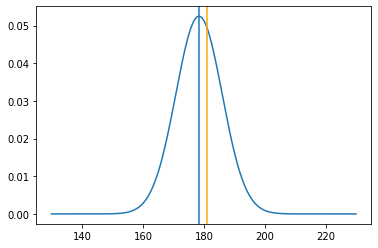

In [59]:
#plot a normal distribution of heights with mean and standard deviation corresponding to the figure above

#generate an x-vector
cm = np.arange(130, 230, 0.1)

muM=178.4 #from figure. In normal distributions median, mean and mode are the same
sigmaM=(186-muM) #from figure


#Rather than typing the full equation for the normal distribution (as we did in earlier chapters), 
#we can use functions to get its probability density function.
# For example norm in this library
from scipy.stats import norm
pdf = norm.pdf(cm , loc = muM, scale = sigmaM) #here loc refers to mean, and scale to standard deviation

plt.plot(cm,pdf)

plt.axvline(muM, 0, 1) #plots the mean value as vertical line
plt.axvline(181, 0, 1, c='orange') #plot the average Dane height
plt.show()


The average male Dane height is slightly taller than the average male height in the above figure. What is the probability to randomly, from all these males, to pick a male that has the height of 181 cm or taller?

Since the data is normally distributed, we do not need to have exact information about all the males to answer this. We can estimate the probability from the area under the Gaussian curve that interest us. The total area under a standardized normal distribution is 1 and relates to the probability of ALL male heights, and so the portion of the curve, from 181 cm and including the right tail, correspond to the probability of a male being 181 cm or taller.

In [39]:
#The cumulative distribution function of norm gives the area up until the given value (in this case 181 cm)
norm(loc = muM, scale = sigmaM).cdf(180)

print("p=")
# We get the probability of 181 cm or higher by subtracting the above from 1 (the probability of all heights)  
1- norm(loc = muM, scale = sigmaM).cdf(180)


p=


0.416628457415268

So if randomly selecting one male person among all these males, the probability is close to 42% that this person is 181 cm or taller.

Now we draw not just one person, but a *sample* of five persons and measure their heights: 180, 190, 188, 194 and 197 cm. 

In [30]:
height= pd.DataFrame([180, 190, 188, 194, 197], columns=(["Height"]))
# We can easily get information about the sample using .describe()
height.describe()

,Height
count,5.000000
mean,189.800000
std,6.496153
min,180.000000
25%,188.000000
50%,190.000000
75%,194.000000
max,197.000000


This sample was collected anonymously, and we do not KNOW whether the persons in the sample were males or females. But because we know heights are normally distributed, we can say something about the probability to draw the sample from the male and female distributions respectively.

### Try out 2:
Compute the probability of randomly picking a person that is between 180-197 cm tall among males and females, respectively? 

In [47]:
#Like before, we can use the data in the figure
muF=164.7 #from figure
sigmaF=(171.8-muF) #from figure

#Then you will need to get the value from the cumulative distribution function, but for two values that we subtract:
#norm(loc = muM, scale = sigmaM).cdf(179)
#norm(loc = muM, scale = sigmaM).cdf(197)

print("p_Male=")

print("p_Fem= ")


p_Male=
p_Fem= 


You should see that, on average, it is much more likely that the sample would come from male persons than females. Still, the probability of randomly drawing females within this range indicates that you are likely to do so more than 2 out of 100 times you draw a sample. 

So *how different* should the heights be before we can, with some certainity, conclude that it is UNLIKELY to be from the female distribution?

<a id= 'Significance'> </a>

## 3. Significance levels
In statistic jargon we often hear that something is "significantly different" from something else. It may sound like something very fixed and certain but that is not really the case, it is still about probability.

A result is generally seen as being statistically significant from that predicted by the null hypothesis, when the *probability of obtaining it by random* is lower than a particular criteria. 

The "statistical signifcant level" of 0.05 (5% or 1/20) is a standard used for testing significance. The significance level is used to see if a score belongs to the outer "tail" of the normal distribution (at a distance of more than $1.96 * \sigma $ from the mean). If the score only has a 5% chance or less of occurring, it is considered to be is so different from the expected value that the difference is significant.

For example, let's say that our sample of heights is so far out in the rightmost tail of the female distribution that the chance of it popping up by chance is less than 5%. Then it would make sense in rejecting the hypothesis that the sample is from females, because it is much more likely that we would get this sample from the male heights distribution. 

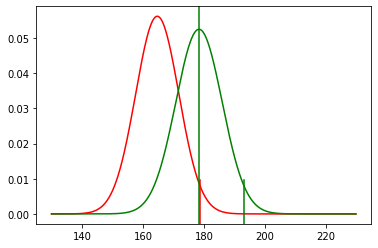

In [54]:
pdfF = norm.pdf(cm, loc = muF, scale = sigmaF) #Female height probability density function 

plt.plot(cm,pdfF, c='red') #Plot the female height distribution
plt.axvline(muF+1.96*sigmaF, 0, 0.2, c='red') #Mark the cutoff for 5% on the upper tail

pdfM = norm.pdf(cm , loc = muM, scale = sigmaM) #Male height probability density function 
plt.plot(cm, pdfM, c='green') #Plot the female height distribution

plt.axvline(muM, 0, 1, c='green') #plots the mean value as vertical green line
plt.axvline(muM+1.96*sigmaM, 0, 0.2, c='green') #Mark the cutoff for 5% on the upper tail

plt.show()

### Try out 3:
Imagine a group of children have been given a specific diet since birth. Did it affect their weights if the average height in the group is 195 cm?

Compute the probability of randomly picking a person that is this height or taller and relate it to the 5% significance criteria for
-  males 
- females


In [53]:
# calculate the probability of norm(loc = , scale = ).cdf(194) for male and female distributions
# deduct the probability from the total (1) to get the answer. 

#Compare to the significance level 0.05


This is at the core of statistical tests: If the sample is so different that it is unlikely
to occur within the normal variation it may in fact belong to a *different* population.
Our experiments are set up to test whether our manipulation have *changed* the dependent variable so much, that it is *unlikely* to have happened by chance. We then *reject* the null hypothesis saying there is no difference between groups.

### Try out 4:
Based on the above exercise form the alternative hypothesis to complement this null hypothesis.
- H0: The diet had no effect on male childrens heights compared to children not following the diet.

Which hypothesis does the data support?


<a id= 'Detecting'> </a>

### 3.1 Detecting effects
In the height example we used above, the guassian heights curves you plotted above can be seen as comparison of data sets from two groups where the change of an independent variable result in a measurable
effect differentiating the two data sets. For heights, the change could be in type of chromosome (x or y), nutrition or other things related to height (not things we would deliberatly manipulate in an experiments). 

Note that the curves are overlapping to some extent that is dependent on the mean and standard deviation of the two distributions. The smaller the standard deviation of the distributions and the further apart the mean values are, the more evident the difference between them become. 

Let us take an example of game scores for an experimental and a control group. In the experimental group additional audio cues were given whereas the control group received none. Did the additional cues (independent variable) have an effect on the resulting scores (dependent variable)?

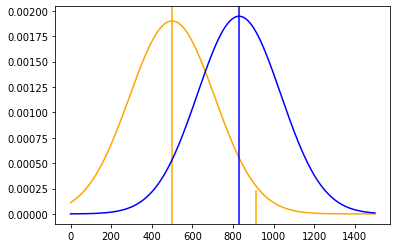

In [72]:

#generate an x-vector of scores
score = np.arange(0, 1500, 1)

#Make-up scores of control group
cont_m=500
cont_std=210

#Plot the probability density function for control group
control = norm.pdf(score, loc = cont_m, scale = cont_std)  
plt.plot(score,control, c='orange') 
plt.axvline(cont_m, 0, 1, c='orange') #Mark the aveage

 #Make-up scores of experimental group
exper_m=830
exper_std=205

exper = norm.pdf(score , loc = exper_m, scale = exper_std)
plt.plot(score, exper, c='blue') #Plot the experimental group
plt.axvline(exper_m, 0, 1, c='blue') #Mark the aveage


#let us also mark the upper 5% in the control group
plt.axvline(cont_m+1.96*cont_std, 0, 0.15, c='orange')

plt.show()

As can be seen, the experimental group performs better. But still the overlap between the curves is such, that it is more than 5% chance of obtaining the blue mean from the orange curve. 

### Try out 5:
Copy the code and redo the plot but reduce the standard deviation to half. What happens to the significance level?


<a id= 'Effect'> </a>

## 4. Effect size
As seen from the example above, the cut-off point of the statistical significance can be adjusted and also depend on the spread of the data. Even if we find that the experimental group has scores different from the control group, it is more interesting to know the size of the effect. Especially because it will help us make decisions based on the results. Is it really worth the cost of implementing the audio cues in the game? Is the effect worth a gamer investing in high quality headphones (duh..)? 

The *effect size* gives us a measure of how much of the variability in the data the effect accounts for. In the plot above, it corresponds to the difference between experimental and control group means. We can think of it as a distance between them. 


### 4.1 Systematic and Unsystematic Variance

- Unsystematic variance in data is essentially random variability. It can be due to preferences, measurement errors etc. 

- Systematic variance on the other hand, is something that causes a systematic difference in measurements between groups. 

In a well-controlled experiment, the systematic variance should *only* be due to the manipulation of the independent variable. Otherwise we will have difficulties in interpreting the results correctly (see Chapter 2 on Designing experiments).

We can return to the game score exampl to illustrate these variances and the effect size. If the null hypothesis was true ("There are no differences in game scores between experimental and control group") we would consider all the collected data points to belong to *one* distribution and the mean would be somewhere between that of the two groups. 


In [124]:
# We generate some fake data for our game score example, 40 scores per group
Control_data=pd.Series(np.random.normal(cont_m, cont_std, 40))
Exper_data=pd.Series(np.random.normal(exper_m, exper_std, 40))

#we now concatenate all these data points into one Series
All_data=pd.concat([Control_data, Exper_data], axis=0)

all_stats=All_data.describe()
#get the description of all the data
all_stats

count      80.000000
mean      690.202054
std       257.225481
min        83.021286
25%       530.713785
50%       679.687797
75%       850.593804
max      1307.437510
dtype: float64

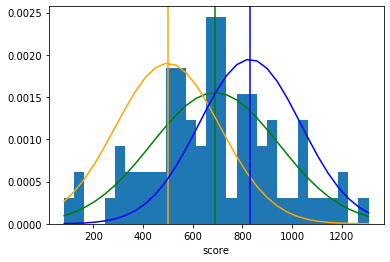

In [125]:
#get the mean of all data points
All_mean=all_stats.iloc[1]
#get the standard deviation
All_std=all_stats.iloc[2]


#together with the mean and standard deviation for each group, we can now put together a plot

#first the histogram of actual data points, but now we also save the bins
count, bins, ignored = plt.hist(All_data, 30, density=True)
plt.xlabel('score')

#then we get the probability density functions for all data and the groups
totpdf= norm.pdf(bins , loc = All_mean, scale = All_std)
control = norm.pdf(bins, loc = cont_m, scale = cont_std) 
exper = norm.pdf(bins, loc = exper_m, scale = exper_std) 

plt.plot(bins,totpdf, c='green') 
plt.axvline(All_mean, 0, 1, c='green') #Mark the total mean

plt.plot(bins,control, c='orange') 
plt.axvline(cont_m, 0, 1, c='orange') #Mark the control group mean

plt.plot(bins, exper, c='blue') #Plot the experimental group
plt.axvline(exper_m, 0, 1, c='blue') #Mark the experimental group mean

plt.show()


As you may recall, the variance is calculated from the squared distance from each data point to the mean. We can now compare these *sum of squares* of all scores (the squared distance from all scores to the grand mean, here in green) with that of the model. That is, how much of the variance that we have is explained by the simple fact that we think they belong to different distributions?

Let's start with the total sum of squares
$$SS_T  =\sum{ (x_n - \bar{x})^2 }$$

In [144]:
#Sum of squares 
#all data points
SS_T=sum((All_data-All_mean)**2)


And then we have our model, with two means different from the total mean. So the sum of squares is simply squaring the diffrence between the group mean and the total, and multiplying with the number in each group (no summation needed):

$$SS_M  =N_{cont}*(\bar{x}_{cont} - \bar{x})^2  +N_{exp}* (\bar{x}_{exp} - \bar{x})^2 $$

If this model is any good, this should account for a big portion of the variance in data. 

In [145]:
#The between-group sum of square is actually simpler
SS_M=Control_data.shape[0] * (cont_m-All_mean)**2 + Exper_data.shape[0] *(exper_m-All_mean)**2 


We can now calculate the proportion of variance explained by the model compared to the total. This is also called $r^2$ 

$$ r^2 =\frac{SS_M}{SS_T}$$

Perhaps you recognize r? It is the same Pearson correlation coefficient that we used earlier. 

When we used linear regression we had another type of model but the principle is the same. The prediction line accounts for some of the systematic variation in data, while other variability is not accounted for (the error). The best fitting line minimizes the error.  

The Pearson correlation coefficient is, in fact, a measure of the effect size which makes it possible to compare also across different experiments!

### Try out 6:
Calculate the effect size $r$ using the two Sum of Sqares above (note that you must take the square root of $r^2$). Is the effect small, medium or large?

<a id= 'Error'> </a>

## 5. Type I and II errors 

As we stated earlier, the chosen significance level ($\alpha$-level) is a criterion for what we are willing to accept if rejecting the null hypothesis on false grounds. This is one of two errors we can make in inferential statistics:

- Type I: Falsly stating that there is a statistically significant effect when in truth, the result occured by chance.
- Type II: Falsly stating that there is NO statistically significant effect when there actually is an effect.

By chosing the 0.05 criteria, we accept that 5% of times we will likely reject the null hypothesis and be utterly wrong.
We can select a more strict significance level. If we use an $\alpha$-level of 0.01 we will only make a Type I error 1% instead - but on the other hand the probabiliyt of making a Type II error (we call this $\beta$) has now increased.

Both these can be problematic and the contect and consequence of the error must decide what criteria that makes sense to use.


<a id= 'Power'> </a>

### 5.1 Statistical power
The *power* of a test is the probability of detecting an effect (if it really exist). The probability of not detecting a genuine effect is $\beta$ and so the probability of actually detecting it is 1-$\beta$. 
As suggested in Fields & Hole, it would be reasonable to detect the actual effect 80% of times ($1-\beta=0.8$).

The power will vary some with the actual statistical test we use (e.g. parametric or non parametric). More imporantly, having made up your mind about the criteria to select for $\alpha$ and $\beta$, and with some idea about the effect size (either from pilot data or earlier literature) we can use this to calculate the sample size needed to actually detect the effect (if any). This is very useful, because it takes time and resources to collect and analyze data. If the effect is small (r=0.1) we would need to recruit 783 participants to detect it with $\alpha=0.05$ and $\beta=0.2$. It is therefore a good investment to estimate the effect size and go through a series of pilot tests to see if changing instructions, making special recruitment criteria or similar can reduce variability and increase effect size.